In [1]:
# from google.colab import files, drive

In [2]:
# up = files.upload()

In [3]:
# drive.mount('/content/drive')

## import dataset

In [1]:
import pandas as pd
data = pd.read_csv('df.csv')
data.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


## cleaning

In [7]:
# clean the data

## encoding

In [9]:
# encode the data

## define x, y

In [3]:
import numpy as np
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
x[:3]

array([[2. , 4. , 8.5],
       [2.4, 4. , 9.6],
       [1.5, 4. , 5.9]])

In [7]:
x.shape

(1067, 3)

In [9]:
y[:3]

array([196, 221, 136], dtype=int64)

In [11]:
y.shape

(1067,)

## spliting

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
x_train[0].shape

(3,)

In [17]:
x_train.shape

(800, 3)

In [21]:
y_train[0].shape

()

In [19]:
y_train.shape

(800,)

## scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## fit the model

In [64]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),  
    tf.keras.layers.Dense(400, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)                       
])

# Note:
# If dropout is used, the number of epochs will increase significantly because learning will be slower.
# L1: It applies a penalty based on the absolute values of weights. This results in zero weights, effectively eliminating less important features.
# L2: It applies a penalty based on the square of the weights. This shrinks the weights but does not set them to zero.
# ElasticNet: combination of L1 and L2
# you can use this code for Elastic Net: kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,801 (163.29 KB)

 Trainable params: 41,801 (163.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',  # tf.keras.optimizers.Adam()             
    loss='mse',        # keras.losses.MeanSquaredError()
    metrics=['mae']
)

# The default optimizer should be Adam. If the model fails to converge or becomes overfitted, switch to SGD.
# however, SGD requires manual configuration.

In [62]:
r = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 993.5997 - mae: 23.4044 - val_loss: 367.1651 - val_mae: 11.3664
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1061.4336 - mae: 24.7118 - val_loss: 371.8862 - val_mae: 10.4280
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1238.7233 - mae: 25.7578 - val_loss: 365.6169 - val_mae: 11.0017
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 999.0677 - mae: 23.8567 - val_loss: 356.7041 - val_mae: 11.1481
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1052.6273 - mae: 24.1176 - val_loss: 360.7308 - val_mae: 11.4588
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1179.8884 - mae: 26.0121 - val_loss: 359.7289 - val_mae: 10.9635
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1159.6208 - mae: 25.1306 - val_loss: 386.4752 - val_mae: 11.5699
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 994.0579 - mae: 23.4162 - val_loss: 364.5977 - val_mae: 10.7303
Epoch 9/10


## visualizing

In [34]:
import matplotlib.pyplot as plt

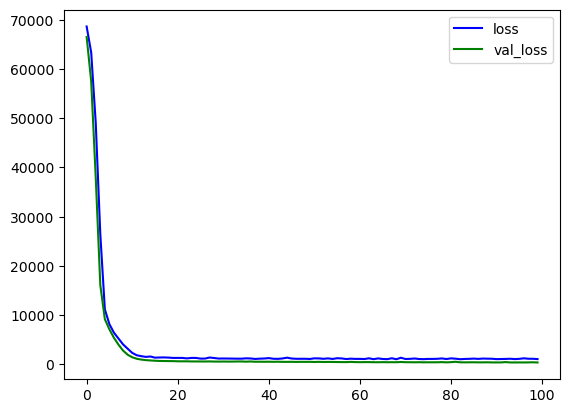

In [37]:
plt.plot(r.history['loss'], label='loss', color='blue')
plt.plot(r.history['val_loss'], label='val_loss', color='green')
plt.legend()

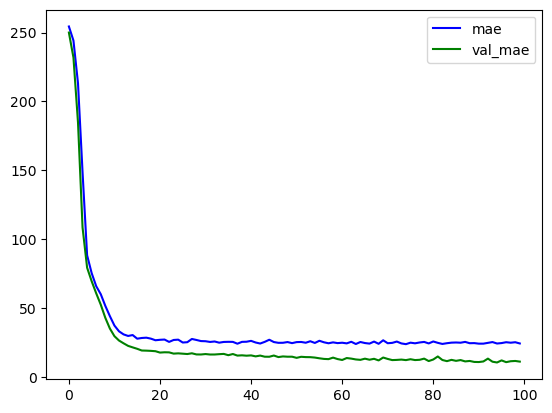

In [39]:
plt.plot(r.history['mae'], label='mae', color='blue')
plt.plot(r.history['val_mae'], label='val_mae', color='green')
plt.legend()

## evaluate the model

In [42]:
from sklearn.metrics import r2_score
yhat_test = model.predict(x_test)
print(f"R2_Score: {r2_score(y_test, yhat_test)}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
R2_Score: 0.9234563708305359


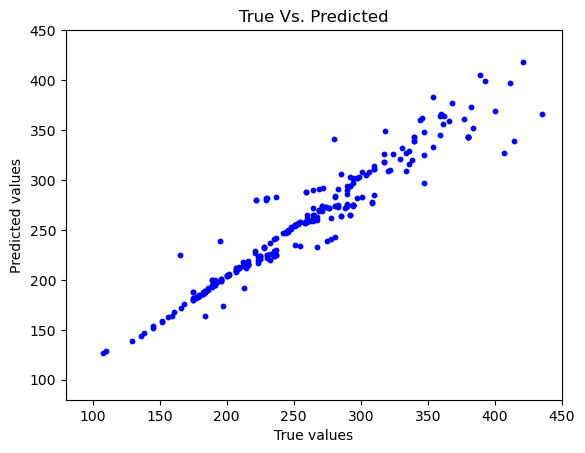

In [60]:
plt.scatter(y_test, yhat_test, s=10, color='blue')
plt.xlim(80, 450)
plt.ylim(80, 450)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True Vs. Predicted')
plt.show()

## predict new data

In [44]:
new_data = sc.transform([[2, 4, 8.5]])  # Use the same MinMaxScaler fitted earlier
print(model.predict(new_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[199.62921]]


## save the model

In [37]:
# model.save('mlp_regression.keras')

## load the model

In [39]:
# model = tf.keras.models.load_model('mlp_regression.keras')